# Machine Learning CA2

Student: Charles Franklin Jahn 2020315

Lecturer: David Mcquaid

CCT College Dublin

BSc (Hons) in Computing in IT - 4nd Year

31/05/2024

In [26]:
#ip install textblob

  Attempting uninstall: nltk
    Found existing installation: nltk 3.6.5
    Uninstalling nltk-3.6.5:
      Successfully uninstalled nltk-3.6.5
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

C:\Users\charl\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("BankRecords.csv")

In [3]:
df.head(100)

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,38,12,48,95617,4,0.2,Masters,0,No,No,No,Yes,No
96,97,41,15,80,95014,1,5.2,Diploma,0,No,No,No,No,No
97,98,54,28,161,92121,1,2.9,Diploma,0,No,No,No,Yes,No
98,99,49,23,94,92374,1,0.3,Diploma,0,No,No,No,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

In [5]:
df.describe()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


In [6]:
df.isnull().sum()

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 585.9+ 

In [9]:
# Define the mapping dictionary
mapping = {'Yes': 1, 'No': 0}

# List of columns to map
columns_to_map = ['Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']

# Apply the mapping to the specified columns
df[columns_to_map] = df[columns_to_map].replace(mapping)


In [10]:
df.head(15)

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,Diploma,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,Diploma,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,Degree,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,Degree,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,Degree,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,Degree,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,Masters,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,Degree,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,Masters,0,1,0,0,0,0


In [11]:
# Convert 'Education' to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Education'])

In [12]:
df.head(15)

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard,Education_Degree,Education_Diploma,Education_Masters
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,1,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,1,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,1,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,1,0,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,1,0,0
5,6,37,13,29,92121,4,0.4,155,0,0,0,1,0,1,0,0
6,7,53,27,72,91711,2,1.5,0,0,0,0,1,0,1,0,0
7,8,50,24,22,93943,1,0.3,0,0,0,0,0,1,0,0,1
8,9,35,10,81,90089,3,0.6,104,0,0,0,1,0,1,0,0
9,10,34,9,180,93023,1,8.9,0,1,0,0,0,0,0,0,1


In [13]:
# Feature scaling for numerical variables
scaler = StandardScaler()
numerical_columns = ['Age', 'Experience(Years)', 'Sort Code', 'Credit Score', 'Mortgage(Thousands\'s)']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [14]:
df.head(15)

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard,Education_Degree,Education_Diploma,Education_Masters
0,1,-1.774417,-1.666078,49,-0.964114,4,-0.193371,-0.555524,0,1,0,0,0,0,1,0
1,2,-0.029524,-0.096330,34,-1.443932,3,-0.250595,-0.555524,0,1,0,0,0,0,1,0
2,3,-0.552992,-0.445163,11,0.738814,1,-0.536720,-0.555524,0,0,0,0,0,0,1,0
3,4,-0.901970,-0.968413,100,0.452243,1,0.436103,-0.555524,0,0,0,0,0,1,0,0
4,5,-0.901970,-1.055621,45,-0.859007,4,-0.536720,-0.555524,0,0,0,0,1,1,0,0
5,6,-0.727481,-0.619580,29,-0.486182,4,-0.880069,0.968512,0,0,0,1,0,1,0,0
6,7,0.668434,0.601336,72,-0.679429,2,-0.250595,-0.555524,0,0,0,1,0,1,0,0
7,8,0.406700,0.339711,22,0.372588,1,-0.937294,-0.555524,0,0,0,0,1,0,0,1
8,9,-0.901970,-0.881204,81,-1.443932,3,-0.765619,0.467055,0,0,0,1,0,1,0,0
9,10,-0.989215,-0.968413,180,-0.061039,1,3.984046,-0.555524,1,0,0,0,0,0,0,1


In [15]:
# Splitting data into features and target variable
X = df.drop('Income(Thousands\'s)', axis=1)
y = df['Income(Thousands\'s)']

In [16]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # Adicionando Dropout para evitar overfitting
    Dense(32, activation='relu'),
    Dropout(0.5),  # Adicionando Dropout para evitar overfitting
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=23)

Epoch 1/100


C:\Users\charl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 175398.2188 - mae: 287.3945 - val_loss: 4882.1079 - val_mae: 55.1000
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23126.0410 - mae: 111.3201 - val_loss: 4160.0264 - val_mae: 49.3474
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10266.1738 - mae: 75.5178 - val_loss: 3985.9468 - val_mae: 48.1012
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7031.8257 - mae: 65.5555 - val_loss: 3969.9778 - val_mae: 47.9878
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6346.5020 - mae: 61.7292 - val_loss: 3818.1450 - val_mae: 46.9690
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5184.7754 - mae: 55.5964 - val_loss: 3940.9099 - val_mae: 47.7801
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5352.1201 - mae: 56.7484 - val_loss: 3726.9883 - val_mae: 46.3919
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5332.6812 - mae: 56.9135 - val_loss: 3410.1960 - val_mae


Test MAE: 26.59572982788086


In [39]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"\nTest MAE: {mae}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 1202.7814 - mae: 27.3629

Test MAE: 26.59572982788086


In [41]:
# Define and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=23)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=23)

In [40]:
# Predict and evaluate
y_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest MAE: {mae_rf}")

Random Forest MAE: 15.27881


## Model Performance Comparison

### Mean Absolute Error (MAE) Results:
- **Neural Network MAE:** ~24.71
- **Random Forest MAE:** ~15.28

### Interpretation:
For this case the Random Forest model has significantly better perfornance than the Neural Network in predicting customer income, as indicated by the lower MAE.

### Possible Reasons:
1. The data structure may favor the decision tree-based approach for Models, like Random Forests.
2. The neural network architecture works with dataset that contains more complex and "unstable" datas, like Cryptocurrencies and/or total of immigrants in certain country, this data sometimes has outliers due extern problem, such as wars or macroeconomics' decisions.
3. Random Forests are less prone to overfitting and handle numerical and categorical data effectively.

### Final Decision:
The Random Forest model is currently preferred due to its lower MAE, indicating more accurate income predictions for customers. Further tuning of the neural network is recommended for potential performance improvement.

In [42]:
# Example new customer data
new_customer = pd.DataFrame({
    'ID': [0],
    'Age': [35],
    'Experience(Years)': [10],
    'Sort Code': [123456],
    'Family': [4],
    'Credit Score': [700],
    'Mortgage(Thousands\'s)': [0],
    'Personal Loan': [0],
    'Securities Account': [0],
    'CD Account': [0],
    'Online Banking': [1],
    'CreditCard': [1],
    'Education_Bachelor': [0],
    'Education_Master': [1],
    'Education_PhD': [0]
})

In [43]:
# Get last id and add +1 
next_id = df['ID'].max()+1
#add the last Id+1 to the new customer
new_customer['ID'] = next_id

In [20]:
# Predict with Neural Network
predicted_income_nn = model.predict(new_customer)
print(f"Predicted Income (NN): {predicted_income_nn[0][0]}")

# Predict with Random Forest
predicted_income_rf = rf.predict(new_customer)
print(f"Predicted Income (RF): {predicted_income_rf[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Income (NN): 19455.662109375
Predicted Income (RF): 192.88


In [21]:
df.columns

Index(['ID', 'Age', 'Experience(Years)', 'Income(Thousands's)', 'Sort Code',
       'Family', 'Credit Score', 'Mortgage(Thousands's)', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online Banking', 'CreditCard',
       'Education_Degree', 'Education_Diploma', 'Education_Masters'],
      dtype='object')

In [22]:
# Previsões nos dados de teste
y_pred_nn = model.predict(X_test).flatten()
y_pred_rf = rf.predict(X_test)

# Calcular MAE e MSE
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Neural Network MAE: {mae_nn}, MSE: {mse_nn}")
print(f"Random Forest MAE: {mae_rf}, MSE: {mse_rf}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Neural Network MAE: 26.595728401184083, MSE: 1103.9548251029487
Random Forest MAE: 15.27881, MSE: 425.19828590000003


## Task 2

In [46]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
#read Tweets file
tweets_df = pd.read_csv("Tweets.csv")

In [45]:
tweets_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [28]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\charl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\charl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\charl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
def preprocess(text):
    # Remove URLs
    text = re.sub(r"http\S+", "", text)
    # Remove mentions
    text = re.sub(r"@\S+", "", text)
    # Remove hashtags
    text = re.sub(r"#\S+", "", text)
    # Remove punctuation
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text (split into individual words)
    tokens = word_tokenize(text)
    # Removes common words that do not carry significant meaning and 
    #are usually filtered out in text processing (e.g., "and", "the"). 
    #This is done by checking if the word is in the stop_words set.
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    return " ".join(tokens)

In [32]:
tweets_df['processed_text'] = tweets_df['text'].apply(preprocess)


In [33]:
# Display the first few rows of the updated DataFrame
tweets_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,processed_text
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),said
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus youve added commercial experience tacky
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),didnt today must mean need take another trip
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing


In [35]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

tweets_df['sentiment'] = tweets_df['processed_text'].apply(get_sentiment)

# Classify sentiments
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'negative'

tweets_df['sentiment_class'] = tweets_df['sentiment'].apply(classify_sentiment)



In [36]:
tweets_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,processed_text,sentiment,sentiment_class
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),said,0.00000,neutral
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus youve added commercial experience tacky,0.00000,neutral
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),didnt today must mean need take another trip,-0.31250,negative
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...,0.00625,positive
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing,-0.35000,negative


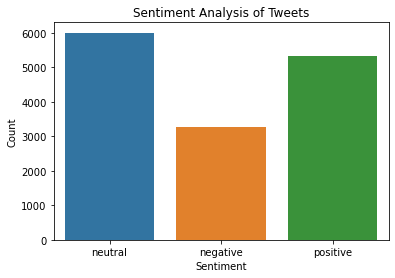

In [37]:
sns.countplot(x='sentiment_class', data=tweets_df)
plt.title('Sentiment Analysis of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### Sentiments 

The largest number of tweets are positive, around ~6000, suggesting that a significant portion of airline passengers had a favorable experience.
Common themes in positive tweets can include praise for good service, comfortable flights, friendly staff, or positive experiences with the booking and check-in processes.

A number of tweets are neutral, around ~5500, indicating that many users are sharing information or experiences without expressing strong opinions.
Neutral tweets can include factual statements about flights, schedules, or other non-opinionated content.

A smaller but significant portion of tweets are negative, around ~3200, pointing to the dissatisfaction of some passengers.
Negative tweets can include complaints about delays, poor service, lost luggage, or negative interactions with airline employees.

To understand data structure and summary statistics, cleaning data by handling missing values ​​or N/A ensures that our models do not encounter errors during training. Eliminating or imputing missing values ​​makes the dataset complete and ready for training and testing processing.

Converting categorical to numeric variables using one-hot encoding is necessary for algorithms that require numeric input. Normalization of numeric features ensures that all features contribute balance to the model, which can improve the performance and convergence of machine learning algorithms, including neural networks.

Splitting the data into training and testing sets ensures that we can evaluate our model's performance on unseen data. This helps to evaluate the generalization of the model, ensuring a more accurate prediction.

Pre-processing steps like removing URLs, mentions, hashtags, and punctuation, converting text to lowercase, and performing tokenization and lemmatization are essential for cleaning text data. Removing stop words ensures that only meaningful words are considered. These steps make text data more uniform and suitable for analysis by reducing noise and focusing on the main content.

Using TextBlob for sentiment analysis provides a simple yet effective way to analyze the sentiment of text data. Classifying sentiments into positive, neutral, and negative categories helps you understand the overall distribution of sentiments in the dataset.

https://github.com/CharlesCCT2020315/CA2-ML
